# **Importing Libraries**

In [1]:
pip install tensorflow

In [2]:
pip install lightgbm

In [3]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.8 MB/s eta 0:00:00


In [4]:

import pandas as pd , numpy as np , matplotlib.pyplot as plt , seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Dropout
from sklearn.ensemble import VotingClassifier
from sklearn.decomposition import PCA


# **Data Preprocessing**

In [14]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [15]:
train_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


Columns to delete :


*   Surname
*   CustomerId



In [16]:
train_df.drop(['Surname','CustomerId'],axis=1,inplace=True)
test_df.drop(['Surname','CustomerId'],axis=1,inplace=True)

Separating numerical columns from categorical ones

In [8]:
train_df.dtypes

id                   int64
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

In [17]:
cat_train_df=train_df[['Geography','Gender']]
num_train_df=train_df.drop(['Geography','Gender'],axis=1)



---



Outliers detection and handling

In [13]:
train_df.shape[0]

84581

In [18]:
num_train_df0=num_train_df.drop('Exited',axis=1)

Using IsolationForest

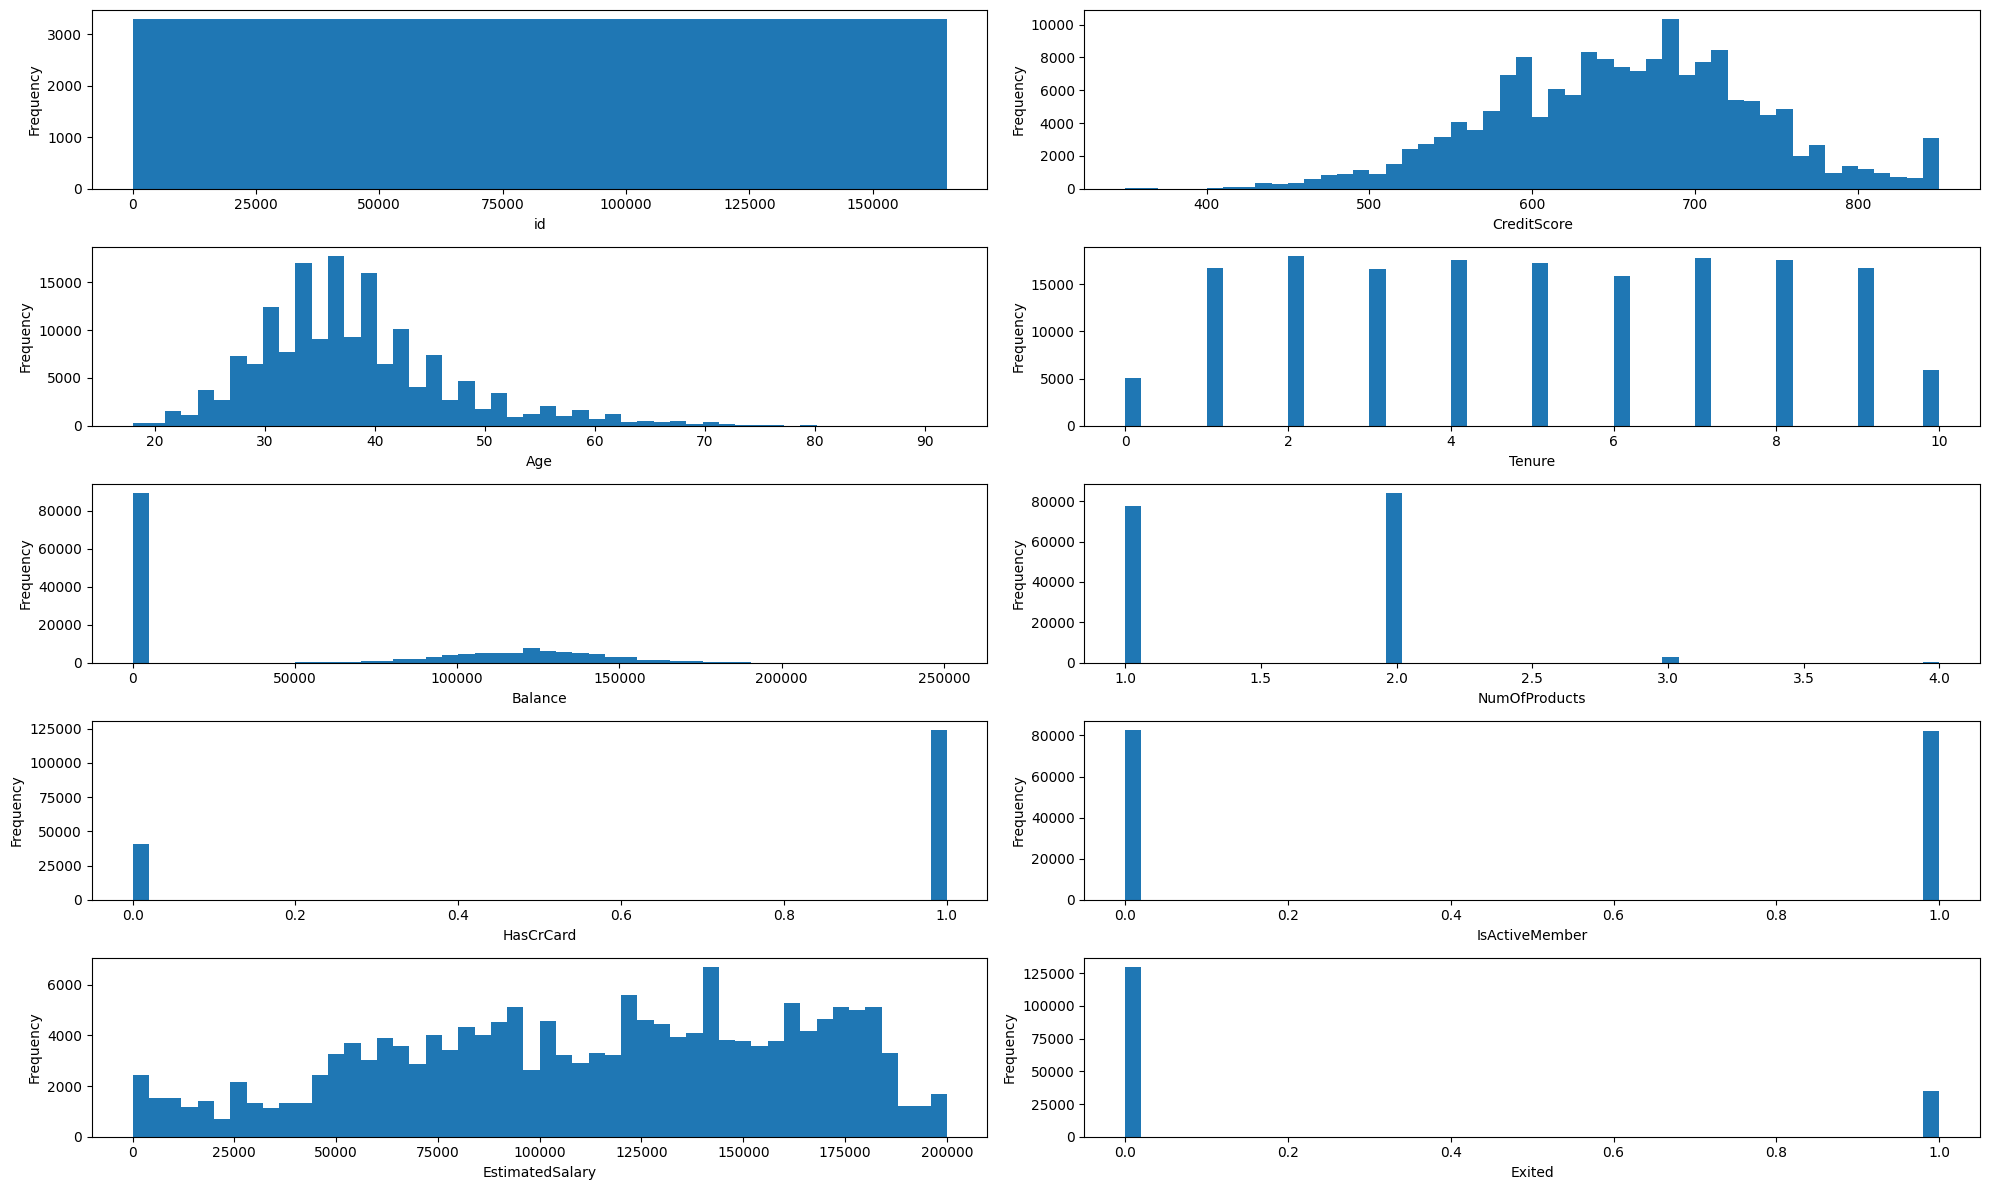

In [52]:
plt.figure(figsize=(20,12))
i = 1
for c in train_df.columns:
    if train_df[c].dtype != 'object':
        plt.subplot(5, 2, i)
        plt.hist(train_df[c],bins=50)
        plt.xlabel(c)
        plt.ylabel('Frequency')
        i += 1
plt.tight_layout()
plt.show()

In [19]:
model=IsolationForest(n_estimators=150, max_samples='auto',
                      contamination=float(0.1),
                      max_features=1.0)
model.fit(num_train_df0)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, n_estimators=150)

In [20]:
scores=model.decision_function(num_train_df0)
anomaly=model.predict(num_train_df0)

num_train_df0['scores']=scores
num_train_df0['anomaly']=anomaly

num_train_df0.head(10)

,id,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,scores,anomaly
0,0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0.072747,1
1,1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0.064841,1
2,2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0.039993,1
3,3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0.036833,1
4,4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0.048939,1
5,5,588,36.0,4,131778.58,1,1.0,0.0,136024.31,0.055549,1
6,6,593,30.0,8,144772.69,1,1.0,0.0,29792.11,0.014748,1
7,7,678,37.0,1,138476.41,1,1.0,0.0,106851.60,0.053960,1
8,8,676,43.0,4,0.00,2,1.0,0.0,142917.13,0.090302,1
9,9,583,40.0,4,81274.33,1,1.0,1.0,170843.07,0.053088,1


In [21]:
anomaly = num_train_df0.loc[num_train_df0['anomaly']==-1]
anomaly_index = list(anomaly.index)
print('Total number of outliers is:', len(anomaly))

Total number of outliers is: 14035


In [22]:
num_train_df0[num_train_df0['anomaly']==-1].head(10)

,id,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,scores,anomaly
12,12,759,71.0,9,0.00,1,1.0,1.0,93081.87,-0.035815,-1
19,19,559,61.0,1,153711.26,1,0.0,1.0,180890.40,-0.065522,-1
20,20,773,35.0,9,0.00,2,0.0,1.0,87549.36,-0.000056,-1
26,26,616,31.0,3,136789.14,2,0.0,1.0,59346.40,-0.015024,-1
32,32,797,55.0,0,99208.46,2,0.0,1.0,62402.38,-0.064849,-1
35,35,413,28.0,3,130969.77,2,1.0,1.0,158891.79,-0.001899,-1
37,37,752,37.0,6,0.00,2,0.0,0.0,1187.88,-0.029243,-1
38,38,551,31.0,9,82293.82,2,0.0,1.0,91565.25,-0.023428,-1
41,41,683,30.0,4,114779.35,1,0.0,0.0,183171.47,-0.010000,-1
42,42,684,31.0,3,142293.54,3,1.0,0.0,146650.60,-0.025750,-1


In [23]:
num_train_df0=num_train_df0.drop(anomaly_index,axis=0).reset_index(drop=True)

In [24]:
num_train_df0.shape[0]

126313

In [25]:
cat_train_df0=cat_train_df.drop(anomaly_index,axis=0).reset_index(drop=True)

In [26]:
target=train_df['Exited'].drop(anomaly_index,axis=0).reset_index(drop=True)

In [27]:
train_df0=pd.concat([num_train_df0,cat_train_df0,target],axis=1)
train_df0.drop(['scores','anomaly'], axis=1,inplace=True)

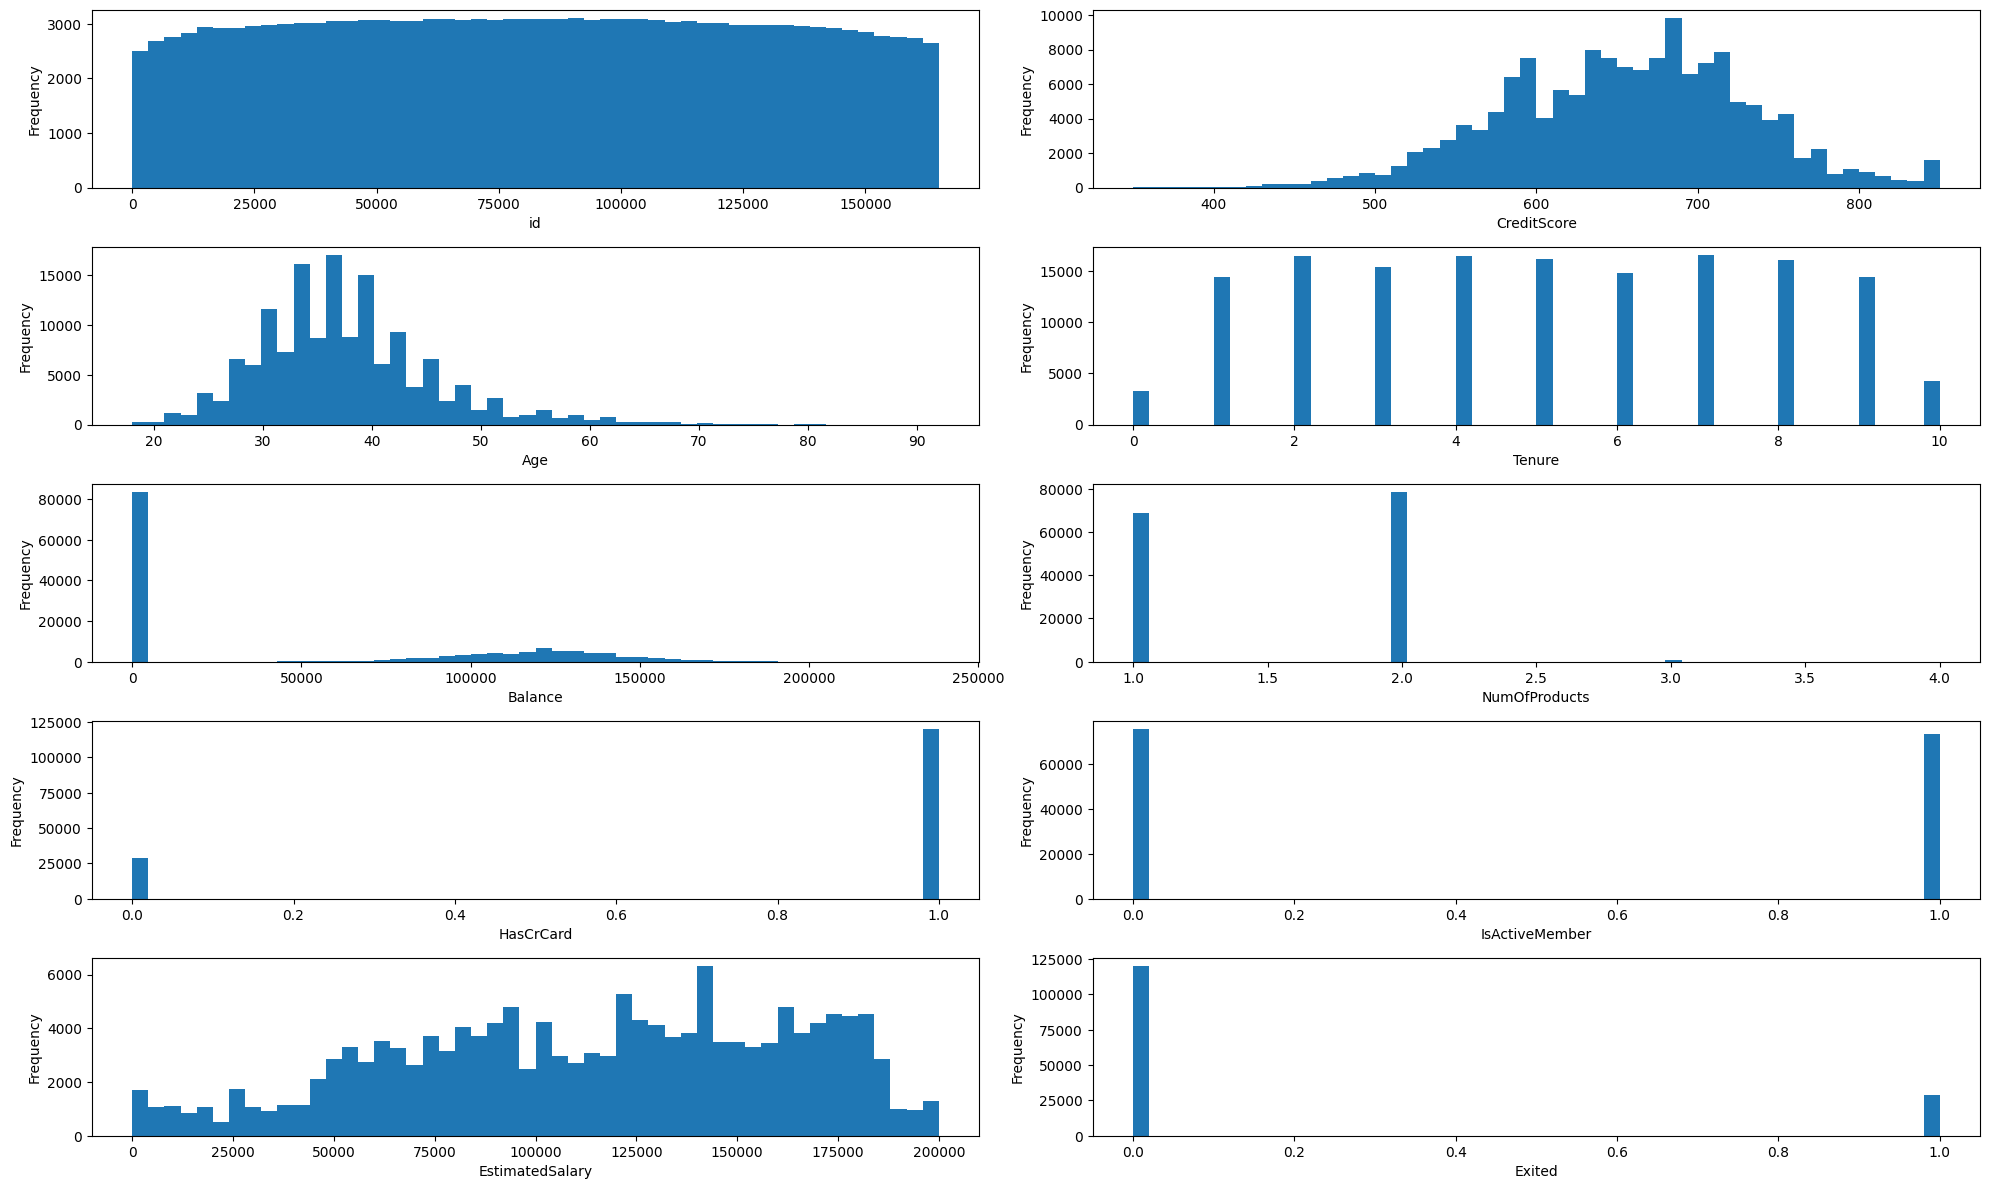

In [22]:
plt.figure(figsize=(20,12))
i = 1
for c in train_df0.columns:
    if train_df0[c].dtype != 'object':
        plt.subplot(5, 2, i)
        plt.hist(train_df0[c],bins=50)
        plt.xlabel(c)
        plt.ylabel('Frequency')
        i += 1
plt.tight_layout()
plt.show()

In [33]:
train_df0.head()

,id,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography,Gender,Exited
0,0,668,33.0,3,0.00,2,1.0,0.0,181449.97,France,Male,0
1,1,627,33.0,1,0.00,2,1.0,1.0,49503.50,France,Male,0
2,2,678,40.0,10,0.00,2,1.0,0.0,184866.69,France,Male,0
3,3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,France,Male,0
4,4,716,33.0,5,0.00,2,1.0,1.0,15068.83,Spain,Male,0


In [28]:
train_df0=train_df0.drop('id',axis=1)
test_df0=test_df.drop('id',axis=1)



---




In [35]:
train_df0['Geography'].value_counts()

France     86471
Spain      32762
Germany    29297
Name: Geography, dtype: int64

In [29]:
dummies = pd.get_dummies(train_df0[['Gender', 'Geography']])
train_df0 = pd.concat([train_df0.drop(['Gender', 'Geography'], axis=1), dummies], axis=1)

In [30]:
dummies = pd.get_dummies(test_df0[['Gender', 'Geography']])
test_df0 = pd.concat([test_df0.drop(['Gender', 'Geography'], axis=1), dummies], axis=1)



---



# **Features Engineering**

In [39]:
train_df0.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,0,1,1,0,0
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,0,1,1,0,0
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,0,1,1,0,0
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0,1,1,0,0
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,1,0,0,1


In [31]:
def newfeature(df):
  df['has_card_active_member']=df['HasCrCard']*df['IsActiveMember']
  df['has_card_active_member_male']=df['HasCrCard']*df['IsActiveMember']*df['Gender_Male']
  df['Estimated_salary/Tenure']=df['EstimatedSalary']/(1+df['Tenure'])
  df['age_cat']=(df['Age']/20).astype(int)
  df['has_balance']=(df['Balance']>0.0).astype(int)
  return df

In [32]:
train_df1=newfeature(train_df0)

In [33]:
test_df1=newfeature(test_df0)

In [34]:
train_df0.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,has_card_active_member,has_card_active_member_male,Estimated_salary/Tenure,age_cat,has_balance
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,0,1,1,0,0,0.0,0.0,45362.492500,1,0
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,0,1,1,0,0,1.0,1.0,24751.750000,1,0
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,0,1,1,0,0,0.0,0.0,16806.062727,2,0
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0,1,1,0,0,1.0,1.0,28186.960000,1,1
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,1,0,0,1,1.0,1.0,2511.471667,1,0


In [35]:
scaler = MinMaxScaler()

columns_to_normalize = ['CreditScore', 'Age', 'Tenure','Balance','NumOfProducts','EstimatedSalary','Estimated_salary/Tenure']
train_df0_normalized = train_df0.copy()
train_df0_normalized[columns_to_normalize] = scaler.fit_transform(train_df0_normalized[columns_to_normalize])


In [36]:
test_df0_normalized = test_df0.copy()
test_df0_normalized[columns_to_normalize] = scaler.fit_transform(test_df0_normalized[columns_to_normalize])

# **ML Modelling**

In [37]:
x=train_df0_normalized.drop('Exited',axis=1)
y=train_df0_normalized['Exited']

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=58)

**Logistic Regression**

In [ ]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
predicted_probabilities = LR.predict_proba(x_test)[:, 1]
auc_roc = roc_auc_score(y_test, predicted_probabilities)
print("AUC-ROC Score:", auc_roc)

AUC-ROC Score: 0.8492393067783681


In [39]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.8 MB/s eta 0:00:00


In [40]:
import optuna

def objective(trial):
    C = trial.suggest_loguniform('C', 0.001, 1000)
    solver = trial.suggest_categorical('solver', ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])
    max_iter = trial.suggest_int('max_iter', 100, 1000)

    clf = LogisticRegression(C=C, solver=solver, max_iter=max_iter, random_state=0)

    X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0)

    clf.fit(X_train, y_train)

    y_pred = clf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    return auc

study = optuna.create_study(direction='maximize')

study.optimize(objective, n_trials=100)

best_params = study.best_params
best_auc = study.best_value

print("Best AUC:", best_auc)
print("Best Hyperparameters:", best_params)


[I 2024-02-19 19:53:57,874] A new study created in memory with name: no-name-9e61552e-8bd3-4ce3-8c46-8d879c75d713
<ipython-input-40-4c3594451024>:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 0.001, 1000)
[W 2024-02-19 19:54:17,255] Trial 0 failed with parameters: {'C': 1.2070339042837128, 'solver': 'saga', 'max_iter': 129} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-40-4c3594451024>", line 12, in objective
    clf.fit(X_train, y_train)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1291, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=sel

KeyboardInterrupt: 

**Decision Tree Classifier**

In [ ]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
predicted_probabilities = DTC.predict_proba(x_test)[:, 1]
auc_roc = roc_auc_score(y_test, predicted_probabilities)
print("AUC-ROC Score:", auc_roc)

AUC-ROC Score: 0.6904888870152405


In [ ]:
def objective(trial):
    max_depth = trial.suggest_int('max_depth', 1, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2', None])
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    splitter = trial.suggest_categorical('splitter', ['best', 'random'])


    clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split,
                                  min_samples_leaf=min_samples_leaf, max_features=max_features,
                                  criterion=criterion, splitter=splitter, random_state=0)


    X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0)

    clf.fit(X_train, y_train)

    y_pred = clf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    return auc

study = optuna.create_study(direction='maximize')

study.optimize(objective, n_trials=500)

best_params = study.best_params
best_auc = study.best_value

print("Best AUC:", best_auc)
print("Best Hyperparameters:", best_params)

[I 2024-02-18 15:38:02,253] A new study created in memory with name: no-name-9b75961c-91d7-4812-b9da-b053044968eb
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
[I 2024-02-18 15:38:02,333] Trial 0 finished with value: 0.8466079610582973 and parameters: {'max_depth': 13, 'min_samples_split': 16, 'min_samples_leaf': 4, 'max_features': 'auto', 'criterion': 'entropy', 'splitter': 'random'}. Best is trial 0 with value: 0.8466079610582973.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
[I 2024-02-18 15:38:02,396] Trial 1 finished with value: 0.8372640099349483 and parameters: {'max_depth': 9, 'min_sampl

Best AUC: 0.8838836473089877
Best Hyperparameters: {'max_depth': 7, 'min_samples_split': 11, 'min_samples_leaf': 20, 'max_features': None, 'criterion': 'entropy', 'splitter': 'best'}


In [114]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predicted_probabilities = RFC.predict_proba(x_test)[:, 1]
auc_roc = roc_auc_score(y_test, predicted_probabilities)
print("AUC-ROC Score:", auc_roc)

AUC-ROC Score: 0.8662813188077115


In [115]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 2, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2', None])
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])

    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                 min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                 max_features=max_features, criterion=criterion, bootstrap=bootstrap,
                                 random_state=0)

    X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0)

    clf.fit(X_train, y_train)

    y_pred = clf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    return auc

study = optuna.create_study(direction='maximize')

study.optimize(objective, n_trials=15)

best_params = study.best_params
best_auc = study.best_value

print("Best AUC:", best_auc)
print("Best Hyperparameters:", best_params)

[I 2024-02-19 16:36:03,126] A new study created in memory with name: no-name-46ff3a75-fe1e-4803-920e-5620418419b1
[I 2024-02-19 16:38:59,639] Trial 0 finished with value: 0.886609722910827 and parameters: {'n_estimators': 762, 'max_depth': 12, 'min_samples_split': 7, 'min_samples_leaf': 20, 'max_features': 'sqrt', 'criterion': 'gini', 'bootstrap': False}. Best is trial 0 with value: 0.886609722910827.
[I 2024-02-19 16:43:57,275] Trial 1 finished with value: 0.885572708344533 and parameters: {'n_estimators': 948, 'max_depth': 17, 'min_samples_split': 2, 'min_samples_leaf': 20, 'max_features': 'log2', 'criterion': 'entropy', 'bootstrap': False}. Best is trial 0 with value: 0.886609722910827.
[I 2024-02-19 16:48:02,738] Trial 2 finished with value: 0.8850816904652362 and parameters: {'n_estimators': 763, 'max_depth': 29, 'min_samples_split': 7, 'min_samples_leaf': 20, 'max_features': 'sqrt', 'criterion': 'entropy', 'bootstrap': False}. Best is trial 0 with value: 0.886609722910827.
[I 202

Best AUC: 0.8869469009400888
Best Hyperparameters: {'n_estimators': 763, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 13, 'max_features': 'log2', 'criterion': 'gini', 'bootstrap': False}


In [116]:
CBC=CatBoostClassifier()
CBC.fit(x_train,y_train)
predicted_probabilities = CBC.predict_proba(x_test)[:, 1]
auc_roc = roc_auc_score(y_test, predicted_probabilities)
print("AUC-ROC Score:", auc_roc)

Learning rate set to 0.079235
0:	learn: 0.6185099	total: 52.5ms	remaining: 52.4s
1:	learn: 0.5573846	total: 82.1ms	remaining: 41s
2:	learn: 0.5126890	total: 111ms	remaining: 36.8s
3:	learn: 0.4750399	total: 141ms	remaining: 35.1s
4:	learn: 0.4456760	total: 173ms	remaining: 34.4s
5:	learn: 0.4227944	total: 204ms	remaining: 33.7s
6:	learn: 0.4037147	total: 234ms	remaining: 33.2s
7:	learn: 0.3882484	total: 262ms	remaining: 32.5s
8:	learn: 0.3761046	total: 289ms	remaining: 31.8s
9:	learn: 0.3661706	total: 316ms	remaining: 31.2s
10:	learn: 0.3572549	total: 342ms	remaining: 30.7s
11:	learn: 0.3498980	total: 368ms	remaining: 30.3s
12:	learn: 0.3438316	total: 400ms	remaining: 30.4s
13:	learn: 0.3389120	total: 428ms	remaining: 30.1s
14:	learn: 0.3349363	total: 454ms	remaining: 29.8s
15:	learn: 0.3316547	total: 483ms	remaining: 29.7s
16:	learn: 0.3286366	total: 541ms	remaining: 31.3s
17:	learn: 0.3263304	total: 568ms	remaining: 31s
18:	learn: 0.3242165	total: 595ms	remaining: 30.7s
19:	learn: 0.

In [117]:

def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.01, 10.0),
        'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 0.1, 10.0)
    }

    clf = CatBoostClassifier(**params, verbose=0, random_state=0)

    X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0)

    # Train classifier
    clf.fit(X_train, y_train)

    # Evaluate classifier on validation set
    y_pred = clf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    return auc

study = optuna.create_study(direction='maximize')

study.optimize(objective, n_trials=50)

best_params = study.best_params
best_auc = study.best_value

print("Best AUC:", best_auc)
print("Best Hyperparameters:", best_params)


[I 2024-02-19 17:35:59,269] A new study created in memory with name: no-name-f0eb9037-9b1b-4e6a-82c9-786ec82cc9ca
<ipython-input-117-b18502c2ec9a>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-117-b18502c2ec9a>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.01, 10.0),
<ipython-input-117-b18502c2ec9a>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_un

Best AUC: 0.8903123585967677
Best Hyperparameters: {'iterations': 690, 'depth': 4, 'learning_rate': 0.05448177925552803, 'l2_leaf_reg': 0.09165997221410027, 'scale_pos_weight': 5.876546795296569}


In [41]:
LGBM=LGBMClassifier()
LGBM.fit(x_train,y_train)
predicted_probabilities = LGBM.predict_proba(x_test)[:, 1]
auc_roc = roc_auc_score(y_test, predicted_probabilities)
print("AUC-ROC Score:", auc_roc)

[LightGBM] [Info] Number of positive: 19565, number of negative: 81485
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1123
[LightGBM] [Info] Number of data points in the train set: 101050, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193617 -> initscore=-1.426677
[LightGBM] [Info] Start training from score -1.426677
AUC-ROC Score: 0.8872394222735658


In [42]:
import optuna
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 2, 32),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-5, 10.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100)
    }

    clf = LGBMClassifier(**params, random_state=0)

    X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0)

    clf.fit(X_train, y_train)

    y_pred = clf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    return auc

study = optuna.create_study(direction='maximize')

study.optimize(objective, n_trials=100)

best_params = study.best_params
best_auc = study.best_value

print("Best AUC:", best_auc)
print("Best Hyperparameters:", best_params)

[I 2024-02-19 19:54:53,287] A new study created in memory with name: no-name-01412a80-ed22-45fa-9d70-bc99275423be
<ipython-input-42-da920fb77080>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-42-da920fb77080>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-42-da920fb77080>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5,

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 19595, number of negative: 81455
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.050180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1122
[LightGBM] [Info] Number of data points in the train set: 101050, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193914 -> initscore=-1.424776
[LightGBM] [Info] Start training from score -1.424776
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2024-02-19 19:55:04,137] Trial 0 finished with value: 0.8841945611645919 and parameters: {'n_estimators': 395, 'max_depth': 20, 'learning_rate': 0.014381166562228468, 'subsample': 0.8931901158946817, 'colsample_bytree': 0.5654323668684468, 'reg_alpha': 0.00018365566913792743, 'reg_lambda': 0.0017913273938726872, 'min_child_samples': 19}. Best is trial 0 with value: 0.8841945611645919.
<ipython-input-42-da920fb77080>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-42-da920fb77080>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-inpu

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 19595, number of negative: 81455
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1122
[LightGBM] [Info] Number of data points in the train set: 101050, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193914 -> initscore=-1.424776
[LightGBM] [Info] Start training from score -1.424776
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2024-02-19 19:55:11,485] Trial 1 finished with value: 0.8849419431746168 and parameters: {'n_estimators': 457, 'max_depth': 19, 'learning_rate': 0.023155157170441427, 'subsample': 0.8005520705543547, 'colsample_bytree': 0.5097287319000712, 'reg_alpha': 0.00441584396870521, 'reg_lambda': 4.811103864049754e-05, 'min_child_samples': 41}. Best is trial 1 with value: 0.8849419431746168.
<ipython-input-42-da920fb77080>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-42-da920fb77080>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-4

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 19595, number of negative: 81455
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1122
[LightGBM] [Info] Number of data points in the train set: 101050, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193914 -> initscore=-1.424776
[LightGBM] [Info] Start training from score -1.424776
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2024-02-19 19:55:18,641] Trial 2 finished with value: 0.8848413390071701 and parameters: {'n_estimators': 558, 'max_depth': 24, 'learning_rate': 0.03229272940128527, 'subsample': 0.5727794317933429, 'colsample_bytree': 0.6458823142532295, 'reg_alpha': 2.4763535557845592e-05, 'reg_lambda': 0.00015819040010454048, 'min_child_samples': 21}. Best is trial 1 with value: 0.8849419431746168.
<ipython-input-42-da920fb77080>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-42-da920fb77080>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-inpu

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 19595, number of negative: 81455
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017862 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1122
[LightGBM] [Info] Number of data points in the train set: 101050, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193914 -> initscore=-1.424776
[LightGBM] [Info] Start training from score -1.424776
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2024-02-19 19:55:21,321] Trial 3 finished with value: 0.8838952332045877 and parameters: {'n_estimators': 155, 'max_depth': 21, 'learning_rate': 0.15506678626838633, 'subsample': 0.6534212830347104, 'colsample_bytree': 0.5459547021328772, 'reg_alpha': 0.0003040479277830989, 'reg_lambda': 0.0011483936300364323, 'min_child_samples': 20}. Best is trial 1 with value: 0.8849419431746168.
<ipython-input-42-da920fb77080>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-42-da920fb77080>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 19595, number of negative: 81455
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029534 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1122
[LightGBM] [Info] Number of data points in the train set: 101050, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193914 -> initscore=-1.424776
[LightGBM] [Info] Start training from score -1.424776


[I 2024-02-19 19:55:23,401] Trial 4 finished with value: 0.8830327060203786 and parameters: {'n_estimators': 134, 'max_depth': 19, 'learning_rate': 0.17929443031153106, 'subsample': 0.7252447438607843, 'colsample_bytree': 0.7041221211611992, 'reg_alpha': 0.005559590174992638, 'reg_lambda': 1.229815537687557e-05, 'min_child_samples': 33}. Best is trial 1 with value: 0.8849419431746168.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


<ipython-input-42-da920fb77080>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-42-da920fb77080>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-42-da920fb77080>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
<ipython-input-42-da920fb77080>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This fe

[LightGBM] [Info] Number of positive: 19595, number of negative: 81455
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017377 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1122
[LightGBM] [Info] Number of data points in the train set: 101050, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193914 -> initscore=-1.424776
[LightGBM] [Info] Start training from score -1.424776
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

[I 2024-02-19 19:55:29,938] Trial 5 finished with value: 0.8826241819297911 and parameters: {'n_estimators': 701, 'max_depth': 3, 'learning_rate': 0.292262771579318, 'subsample': 0.5743021974152712, 'colsample_bytree': 0.6090236353210587, 'reg_alpha': 6.480877061595255, 'reg_lambda': 0.0004655327882232641, 'min_child_samples': 63}. Best is trial 1 with value: 0.8849419431746168.
<ipython-input-42-da920fb77080>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-42-da920fb77080>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-42-da92

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 19595, number of negative: 81455
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1122
[LightGBM] [Info] Number of data points in the train set: 101050, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193914 -> initscore=-1.424776
[LightGBM] [Info] Start training from score -1.424776
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2024-02-19 19:55:32,236] Trial 6 finished with value: 0.884100153505122 and parameters: {'n_estimators': 132, 'max_depth': 31, 'learning_rate': 0.06957449286016486, 'subsample': 0.9957097445513753, 'colsample_bytree': 0.987058429143375, 'reg_alpha': 0.0006943793671943338, 'reg_lambda': 2.128331763834902, 'min_child_samples': 69}. Best is trial 1 with value: 0.8849419431746168.
<ipython-input-42-da920fb77080>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-42-da920fb77080>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-42-da9

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 19595, number of negative: 81455
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026259 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1122
[LightGBM] [Info] Number of data points in the train set: 101050, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193914 -> initscore=-1.424776
[LightGBM] [Info] Start training from score -1.424776
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2024-02-19 19:55:39,941] Trial 7 finished with value: 0.8848933312725821 and parameters: {'n_estimators': 543, 'max_depth': 22, 'learning_rate': 0.041139380089733904, 'subsample': 0.5714843912332455, 'colsample_bytree': 0.6358244439429226, 'reg_alpha': 0.0006627464333704376, 'reg_lambda': 0.0003895547349569337, 'min_child_samples': 65}. Best is trial 1 with value: 0.8849419431746168.
<ipython-input-42-da920fb77080>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-42-da920fb77080>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 19595, number of negative: 81455
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1122
[LightGBM] [Info] Number of data points in the train set: 101050, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193914 -> initscore=-1.424776
[LightGBM] [Info] Start training from score -1.424776
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2024-02-19 19:55:46,980] Trial 8 finished with value: 0.8837046163449903 and parameters: {'n_estimators': 429, 'max_depth': 26, 'learning_rate': 0.012200892868820267, 'subsample': 0.9232540083663452, 'colsample_bytree': 0.5120114757574324, 'reg_alpha': 3.6526499247774176, 'reg_lambda': 0.00868188207637794, 'min_child_samples': 11}. Best is trial 1 with value: 0.8849419431746168.
<ipython-input-42-da920fb77080>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-42-da920fb77080>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-42-d

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 19595, number of negative: 81455
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008863 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1122
[LightGBM] [Info] Number of data points in the train set: 101050, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193914 -> initscore=-1.424776
[LightGBM] [Info] Start training from score -1.424776
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2024-02-19 19:55:56,606] Trial 9 finished with value: 0.8708610222048598 and parameters: {'n_estimators': 856, 'max_depth': 32, 'learning_rate': 0.19853371128456393, 'subsample': 0.8872501422887491, 'colsample_bytree': 0.9585561380402776, 'reg_alpha': 0.06440379253748368, 'reg_lambda': 1.0904370259464167, 'min_child_samples': 84}. Best is trial 1 with value: 0.8849419431746168.
<ipython-input-42-da920fb77080>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-42-da920fb77080>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-42-da

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 19595, number of negative: 81455
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1122
[LightGBM] [Info] Number of data points in the train set: 101050, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193914 -> initscore=-1.424776
[LightGBM] [Info] Start training from score -1.424776
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2024-02-19 19:56:10,135] Trial 10 finished with value: 0.8846792448915584 and parameters: {'n_estimators': 990, 'max_depth': 10, 'learning_rate': 0.02382074812307524, 'subsample': 0.7876500045248315, 'colsample_bytree': 0.8348246555589031, 'reg_alpha': 0.12081668670133787, 'reg_lambda': 0.13009728257011186, 'min_child_samples': 43}. Best is trial 1 with value: 0.8849419431746168.
<ipython-input-42-da920fb77080>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-42-da920fb77080>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-42-

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 19595, number of negative: 81455
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006856 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1122
[LightGBM] [Info] Number of data points in the train set: 101050, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193914 -> initscore=-1.424776
[LightGBM] [Info] Start training from score -1.424776
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2024-02-19 19:56:18,561] Trial 11 finished with value: 0.883472618492427 and parameters: {'n_estimators': 557, 'max_depth': 13, 'learning_rate': 0.05989040005373957, 'subsample': 0.5084031253825161, 'colsample_bytree': 0.7447962030751545, 'reg_alpha': 0.005076267937239731, 'reg_lambda': 3.1749552513931475e-05, 'min_child_samples': 96}. Best is trial 1 with value: 0.8849419431746168.
<ipython-input-42-da920fb77080>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-42-da920fb77080>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 19595, number of negative: 81455
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1122
[LightGBM] [Info] Number of data points in the train set: 101050, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193914 -> initscore=-1.424776
[LightGBM] [Info] Start training from score -1.424776
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2024-02-19 19:56:23,904] Trial 12 finished with value: 0.8847602993732954 and parameters: {'n_estimators': 357, 'max_depth': 14, 'learning_rate': 0.031057765652794285, 'subsample': 0.7719075210267854, 'colsample_bytree': 0.6466995535293213, 'reg_alpha': 0.046203766361874954, 'reg_lambda': 8.844663066997446e-05, 'min_child_samples': 54}. Best is trial 1 with value: 0.8849419431746168.
<ipython-input-42-da920fb77080>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-42-da920fb77080>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 19595, number of negative: 81455
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1122
[LightGBM] [Info] Number of data points in the train set: 101050, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193914 -> initscore=-1.424776
[LightGBM] [Info] Start training from score -1.424776
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2024-02-19 19:56:32,430] Trial 13 finished with value: 0.8838503481160565 and parameters: {'n_estimators': 647, 'max_depth': 26, 'learning_rate': 0.045956920390868704, 'subsample': 0.6939648102308438, 'colsample_bytree': 0.8179254014197403, 'reg_alpha': 0.0015355969825858282, 'reg_lambda': 0.02992025771204767, 'min_child_samples': 76}. Best is trial 1 with value: 0.8849419431746168.
<ipython-input-42-da920fb77080>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-42-da920fb77080>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 19595, number of negative: 81455
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017439 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1122
[LightGBM] [Info] Number of data points in the train set: 101050, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193914 -> initscore=-1.424776
[LightGBM] [Info] Start training from score -1.424776
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2024-02-19 19:56:37,613] Trial 14 finished with value: 0.8843734927563515 and parameters: {'n_estimators': 313, 'max_depth': 15, 'learning_rate': 0.020172795147682873, 'subsample': 0.8101750369123458, 'colsample_bytree': 0.5053983187247119, 'reg_alpha': 2.397074784525441e-05, 'reg_lambda': 1.0219391528173286e-05, 'min_child_samples': 43}. Best is trial 1 with value: 0.8849419431746168.
<ipython-input-42-da920fb77080>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-42-da920fb77080>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-inp

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 19595, number of negative: 81455
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027106 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1122
[LightGBM] [Info] Number of data points in the train set: 101050, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193914 -> initscore=-1.424776
[LightGBM] [Info] Start training from score -1.424776
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_de

[I 2024-02-19 19:56:46,528] Trial 15 finished with value: 0.8809591129261314 and parameters: {'n_estimators': 753, 'max_depth': 10, 'learning_rate': 0.09860409408640675, 'subsample': 0.6289901994988205, 'colsample_bytree': 0.599125657813081, 'reg_alpha': 0.3000777646996108, 'reg_lambda': 0.00017786863292513353, 'min_child_samples': 57}. Best is trial 1 with value: 0.8849419431746168.
<ipython-input-42-da920fb77080>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-42-da920fb77080>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-42

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 19595, number of negative: 81455
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1122
[LightGBM] [Info] Number of data points in the train set: 101050, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193914 -> initscore=-1.424776
[LightGBM] [Info] Start training from score -1.424776
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2024-02-19 19:56:53,692] Trial 16 finished with value: 0.884490528558369 and parameters: {'n_estimators': 494, 'max_depth': 23, 'learning_rate': 0.04084571687843499, 'subsample': 0.8412694405413353, 'colsample_bytree': 0.6769861721950667, 'reg_alpha': 8.179983052995383e-05, 'reg_lambda': 0.0048415126039095145, 'min_child_samples': 41}. Best is trial 1 with value: 0.8849419431746168.
<ipython-input-42-da920fb77080>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-42-da920fb77080>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 19595, number of negative: 81455
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004715 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1122
[LightGBM] [Info] Number of data points in the train set: 101050, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193914 -> initscore=-1.424776
[LightGBM] [Info] Start training from score -1.424776
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


[I 2024-02-19 19:56:58,173] Trial 17 finished with value: 0.8839553868451223 and parameters: {'n_estimators': 274, 'max_depth': 17, 'learning_rate': 0.019717177214026625, 'subsample': 0.5044799182183481, 'colsample_bytree': 0.804489001978432, 'reg_alpha': 0.0019053663190135427, 'reg_lambda': 0.05569476202401012, 'min_child_samples': 84}. Best is trial 1 with value: 0.8849419431746168.
<ipython-input-42-da920fb77080>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-42-da920fb77080>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-4

[LightGBM] [Info] Number of positive: 19595, number of negative: 81455
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017454 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1122
[LightGBM] [Info] Number of data points in the train set: 101050, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193914 -> initscore=-1.424776
[LightGBM] [Info] Start training from score -1.424776
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-02-19 19:57:03,627] Trial 18 finished with value: 0.8819495494970426 and parameters: {'n_estimators': 597, 'max_depth': 2, 'learning_rate': 0.08567759560324802, 'subsample': 0.7188718027205556, 'colsample_bytree': 0.5891775453394162, 'reg_alpha': 0.021630720420954513, 'reg_lambda': 5.252634583374934e-05, 'min_child_samples': 35}. Best is trial 1 with value: 0.8849419431746168.
<ipython-input-42-da920fb77080>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-42-da920fb77080>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-4

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 19595, number of negative: 81455
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033134 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1122
[LightGBM] [Info] Number of data points in the train set: 101050, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193914 -> initscore=-1.424776
[LightGBM] [Info] Start training from score -1.424776


[W 2024-02-19 19:57:04,367] Trial 19 failed with parameters: {'n_estimators': 476, 'max_depth': 28, 'learning_rate': 0.010697166574488381, 'subsample': 0.6500840759261672, 'colsample_bytree': 0.7277861405867023, 'reg_alpha': 0.8650692686313571, 'reg_lambda': 0.0005598538046746251, 'min_child_samples': 69} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-42-da920fb77080>", line 18, in objective
    clf.fit(X_train, y_train)
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py", line 1142, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py", line 842, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py", line 276, in train
    booster.update(fobj=fobj)
  File "/usr/local/lib/python3.10/dist-p

KeyboardInterrupt: 

In [ ]:
SVC=SVC(probability=True)
SVC.fit(x_train,y_train)
predicted_probabilities = SVC.predict_proba(x_test)[:, 1]
auc_roc = roc_auc_score(y_test, predicted_probabilities)
print("AUC-ROC Score:", auc_roc)

AUC-ROC Score: 0.8211218117164603


# **ANN**

In [94]:
x.shape[1]

18

In [97]:

# Define the model
model = Sequential()

# Add input layer
model.add(Dense(units=32, input_shape=(18,), activation='relu'))

# Add hidden layers
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=32, activation='relu'))

# Add output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                608       
                                                                 
 dense_7 (Dense)             (None, 512)               16896     
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 dense_9 (Dense)             (None, 32)                16416     
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 296609 (1.13 MB)
Trainable params: 296609 (1.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [98]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                    epochs=50, verbose=2)


Epoch 1/50
3714/3714 - 26s - loss: 0.3414 - accuracy: 0.8577 - val_loss: 0.3206 - val_accuracy: 0.8656 - 26s/epoch - 7ms/step
Epoch 2/50
3714/3714 - 26s - loss: 0.3207 - accuracy: 0.8657 - val_loss: 0.3200 - val_accuracy: 0.8670 - 26s/epoch - 7ms/step
Epoch 3/50
3714/3714 - 24s - loss: 0.3177 - accuracy: 0.8668 - val_loss: 0.3164 - val_accuracy: 0.8682 - 24s/epoch - 6ms/step
Epoch 4/50


KeyboardInterrupt: 

In [75]:
predicted_probabilities = model.predict(x_test)

auc_roc = roc_auc_score(y_test, predicted_probabilities)

print("AUC-ROC Score:", auc_roc)

929/929 [==============================] - 5s 5ms/step
AUC-ROC Score: 0.8873548106409948




---



In [109]:

# Define the model
model1 = Sequential()

# Add input layer
model1.add(Dense(units=64, input_shape=(18,), activation='relu'))

# Add hidden layers
model1.add(Dense(units=64, activation='relu'))
model1.add(Dense(units=256, activation='relu'))
model1.add(Dense(units=256, activation='relu'))
model1.add(Dropout(0.02))
model1.add(Dense(units=128, activation='relu'))

# Add output layer
model1.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model1.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 64)                1216      
                                                                 
 dense_21 (Dense)            (None, 64)                4160      
                                                                 
 dense_22 (Dense)            (None, 256)               16640     
                                                                 
 dense_23 (Dense)            (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_24 (Dense)            (None, 128)               32896     
                                                                 
 dense_25 (Dense)            (None, 1)                

In [110]:
history1 = model1.fit(x_train, y_train, validation_data=(x_test, y_test),
                    epochs=50, verbose=2)


Epoch 1/50
3714/3714 - 42s - loss: 0.3367 - accuracy: 0.8602 - val_loss: 0.3263 - val_accuracy: 0.8687 - 42s/epoch - 11ms/step
Epoch 2/50
3714/3714 - 16s - loss: 0.3205 - accuracy: 0.8662 - val_loss: 0.3212 - val_accuracy: 0.8672 - 16s/epoch - 4ms/step
Epoch 3/50
3714/3714 - 18s - loss: 0.3177 - accuracy: 0.8673 - val_loss: 0.3202 - val_accuracy: 0.8680 - 18s/epoch - 5ms/step
Epoch 4/50
3714/3714 - 17s - loss: 0.3164 - accuracy: 0.8674 - val_loss: 0.3159 - val_accuracy: 0.8682 - 17s/epoch - 5ms/step
Epoch 5/50
3714/3714 - 16s - loss: 0.3149 - accuracy: 0.8688 - val_loss: 0.3150 - val_accuracy: 0.8687 - 16s/epoch - 4ms/step
Epoch 6/50
3714/3714 - 17s - loss: 0.3149 - accuracy: 0.8683 - val_loss: 0.3185 - val_accuracy: 0.8687 - 17s/epoch - 5ms/step
Epoch 7/50
3714/3714 - 17s - loss: 0.3141 - accuracy: 0.8690 - val_loss: 0.3160 - val_accuracy: 0.8678 - 17s/epoch - 5ms/step
Epoch 8/50
3714/3714 - 16s - loss: 0.3139 - accuracy: 0.8692 - val_loss: 0.3170 - val_accuracy: 0.8681 - 16s/epoch - 

In [111]:
predicted_probabilities = model1.predict(x_test)

auc_roc1 = roc_auc_score(y_test, predicted_probabilities)

print("AUC-ROC Score:", auc_roc1)

929/929 [==============================] - 2s 2ms/step
AUC-ROC Score: 0.8822570470892911


# **Voting Classifier**

In [43]:
pip install scikeras

In [110]:
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from scikeras.wrappers import KerasClassifier

# Define the models with specific parameters
catboost_model = CatBoostClassifier(iterations=866, depth=8, learning_rate=0.014698212608323668, l2_leaf_reg=6.763239895719053, scale_pos_weight=3.454672664101342)
lgbm_model = LGBMClassifier(n_estimators=352, max_depth=9, learning_rate=0.03007832416750618, subsample=0.6487749522395558, colsample_bytree=0.6210315108589157, reg_alpha=0.14327109965365606, reg_lambda=0.006906421854897233, min_child_samples=100)


# Wrap the Keras model inside a scikit-learn classifier
neural_net_classifier = KerasClassifier(build_fn=create_neural_net)

# Define the voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ('catboost', catboost_model),
        ('neural_net', neural_net_classifier),
        ('lgbm', lgbm_model)
    ],
    voting='soft'  # Use soft voting for probability voting
)

# Train the voting classifier
voting_clf.fit(x_train, y_train)

# Evaluate the voting classifier
accuracy = voting_clf.score(x_test, y_test)
print("Voting Classifier Accuracy:", accuracy)


0:	learn: 0.6838992	total: 34.3ms	remaining: 29.6s
1:	learn: 0.6748727	total: 71.7ms	remaining: 31s
2:	learn: 0.6658654	total: 109ms	remaining: 31.2s
3:	learn: 0.6573452	total: 147ms	remaining: 31.7s
4:	learn: 0.6489115	total: 185ms	remaining: 31.9s
5:	learn: 0.6411732	total: 221ms	remaining: 31.7s
6:	learn: 0.6333383	total: 262ms	remaining: 32.2s
7:	learn: 0.6259515	total: 300ms	remaining: 32.2s
8:	learn: 0.6187353	total: 333ms	remaining: 31.7s
9:	learn: 0.6117540	total: 367ms	remaining: 31.4s
10:	learn: 0.6050953	total: 400ms	remaining: 31.1s
11:	learn: 0.5990473	total: 444ms	remaining: 31.6s
12:	learn: 0.5931391	total: 482ms	remaining: 31.7s
13:	learn: 0.5871154	total: 516ms	remaining: 31.4s
14:	learn: 0.5813467	total: 555ms	remaining: 31.5s
15:	learn: 0.5758017	total: 588ms	remaining: 31.2s
16:	learn: 0.5704505	total: 622ms	remaining: 31.1s
17:	learn: 0.5653728	total: 656ms	remaining: 30.9s
18:	learn: 0.5604401	total: 696ms	remaining: 31s
19:	learn: 0.5558178	total: 749ms	remaining

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


3714/3714 [==============================] - 8s 2ms/step - loss: 0.3119 - accuracy: 0.8698
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 22997, number of negative: 95827
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002707 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 118824, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.193538 -> initscore=-1.427181
[LightGBM] [Info] Start training from score -1.427181
929/929 [==============================] - 1s 1ms/step
[LightGBM] [Warning] Accuracy may be

In [93]:
pred_probabilities = voting_clf.predict_proba(x_test)[:, 1]

auc_roc = roc_auc_score(y_test, pred_probabilities)

print("AUC-ROC Score:", auc_roc)

929/929 [==============================] - 3s 3ms/step
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
AUC-ROC Score: 0.8909406252088755




---



In [46]:
from sklearn.ensemble import VotingClassifier

from scikeras.wrappers import KerasClassifier

# Define the models with specific parameters
catboost_model = CatBoostClassifier(iterations=690, depth=4, learning_rate=0.05448177925552803, l2_leaf_reg=0.09165997221410027, scale_pos_weight=5.876546795296569)
lgbm_model = LGBMClassifier()
rfc = RandomForestClassifier(n_estimators=763, max_depth=10, min_samples_split=10, min_samples_leaf=13, max_features='log2', criterion='gini', bootstrap=False)


# Define the voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ('catboost', catboost_model),
        ('lgbm', lgbm_model),
        ('rfc', rfc)
    ],
    voting='soft'  # Use soft voting for probability voting
)

# Train the voting classifier
voting_clf.fit(x, y)


0:	learn: 0.6641269	total: 103ms	remaining: 1m 11s
1:	learn: 0.6403960	total: 180ms	remaining: 1m 1s
2:	learn: 0.6182533	total: 244ms	remaining: 56s
3:	learn: 0.5980074	total: 349ms	remaining: 59.9s
4:	learn: 0.5817357	total: 439ms	remaining: 1m
5:	learn: 0.5667366	total: 507ms	remaining: 57.8s
6:	learn: 0.5527064	total: 574ms	remaining: 56s
7:	learn: 0.5415214	total: 637ms	remaining: 54.3s
8:	learn: 0.5316039	total: 699ms	remaining: 52.9s
9:	learn: 0.5223286	total: 765ms	remaining: 52s
10:	learn: 0.5138014	total: 833ms	remaining: 51.4s
11:	learn: 0.5066864	total: 896ms	remaining: 50.6s
12:	learn: 0.4998398	total: 960ms	remaining: 50s
13:	learn: 0.4938746	total: 1.04s	remaining: 50.2s
14:	learn: 0.4878549	total: 1.1s	remaining: 49.5s
15:	learn: 0.4825495	total: 1.18s	remaining: 49.7s
16:	learn: 0.4776903	total: 1.24s	remaining: 49.3s
17:	learn: 0.4735573	total: 1.27s	remaining: 47.4s
18:	learn: 0.4701468	total: 1.3s	remaining: 45.8s
19:	learn: 0.4669814	total: 1.33s	remaining: 44.5s
20

VotingClassifier(estimators=[('catboost',
                              <catboost.core.CatBoostClassifier object at 0x7daabc43d6f0>),
                             ('lgbm', LGBMClassifier()),
                             ('rfc',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=10,
                                                     max_features='log2',
                                                     min_samples_leaf=13,
                                                     min_samples_split=10,
                                                     n_estimators=763))],
                 voting='soft')

In [45]:
pred_probabilities1 = voting_clf.predict_proba(x_test)[:, 1]

auc_roc = roc_auc_score(y_test, pred_probabilities1)

print("AUC-ROC Score:", auc_roc)

AUC-ROC Score: 0.8876374405697155


# **Submission VC2**

In [88]:
test_df0_normalized

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain,has_card_active_member,has_card_active_member_male,Estimated_salary/Tenure,age_cat,has_balance
0,0.472,0.067568,0.2,0.000000,0.333333,0.0,1.0,0.804903,1,0,1,0,0,0.0,0.0,0.268299,1,0
1,0.666,0.378378,0.2,0.000000,0.000000,1.0,0.0,0.362723,1,0,1,0,0,0.0,0.0,0.120914,2,0
2,0.612,0.216216,0.7,0.000000,0.333333,1.0,0.0,0.694419,1,0,1,0,0,0.0,0.0,0.086798,1,0
3,0.662,0.243243,0.8,0.000000,0.000000,1.0,0.0,0.569654,0,1,1,0,0,0.0,0.0,0.063291,1,0
4,0.804,0.270270,1.0,0.483318,0.000000,1.0,0.0,0.697164,0,1,0,1,0,0.0,0.0,0.063373,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,0.440,0.148649,0.7,0.462737,0.000000,1.0,1.0,0.740451,0,1,0,0,1,1.0,1.0,0.092552,1,1
110019,0.450,0.243243,0.4,0.709581,0.000000,1.0,1.0,0.210871,1,0,1,0,0,1.0,0.0,0.042176,1,1
110020,0.724,0.175676,0.2,0.000000,0.333333,1.0,0.0,0.081387,0,1,1,0,0,0.0,0.0,0.027140,1,0
110021,0.718,0.189189,0.3,0.000000,0.000000,1.0,1.0,0.794101,1,0,1,0,0,1.0,0.0,0.198522,1,0


In [48]:
Exited = voting_clf.predict_proba(test_df0_normalized)[:, 1]


# Create a DataFrame with IDs and predicted probabilities
result_df = pd.DataFrame({'id': test_df['id'], 'Exited': Exited})

# Save the result to a CSV file
result_df.to_csv('predicted_results_vc3.csv', index=False)

# **PCA With Catboost**

In [77]:
x_train.shape

(118824, 18)

In [81]:
cbc= CatBoostClassifier()
for n in range(1, 30):
    pca = PCA(n_components=n)
    xtrain = pca.fit_transform(x_train)
    xtest = pca.transform(x_test)

    cbc.fit(xtrain, y_train)
    pred_prob = cbc.predict_proba(xtest)[:, 1]

    auc = roc_auc_score(y_test, pred_prob)
    print(n, ':', auc)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
9:	learn: 0.3782113	total: 693ms	remaining: 1m 8s
10:	learn: 0.3701262	total: 769ms	remaining: 1m 9s
11:	learn: 0.3645896	total: 835ms	remaining: 1m 8s
12:	learn: 0.3588367	total: 921ms	remaining: 1m 9s
13:	learn: 0.3541489	total: 993ms	remaining: 1m 9s
14:	learn: 0.3501372	total: 1.06s	remaining: 1m 9s
15:	learn: 0.3464269	total: 1.14s	remaining: 1m 10s
16:	learn: 0.3435173	total: 1.22s	remaining: 1m 10s
17:	learn: 0.3415146	total: 1.29s	remaining: 1m 10s
18:	learn: 0.3397550	total: 1.37s	remaining: 1m 10s
19:	learn: 0.3376794	total: 1.43s	remaining: 1m 10s
20:	learn: 0.3358215	total: 1.51s	remaining: 1m 10s
21:	learn: 0.3342106	total: 1.56s	remaining: 1m 9s
22:	learn: 0.3330573	total: 1.64s	remaining: 1m 9s
23:	learn: 0.3319481	total: 1.7s	remaining: 1m 9s
24:	learn: 0.3309890	total: 1.78s	remaining: 1m 9s
25:	learn: 0.3297392	total: 1.86s	remaining: 1m 9s
26:	learn: 0.3289876	total: 1.95s	remaining: 1m 10s

ValueError: n_components=19 must be between 0 and min(n_samples, n_features)=18 with svd_solver='full'

In [83]:
from catboost import CatBoostClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import optuna

# Fit CatBoostClassifier with PCA-transformed training data
CBC = CatBoostClassifier()
pca = PCA(n_components=16)
x_train_pca = pca.fit_transform(x_train)
CBC.fit(x_train_pca, y_train)

# Predict probabilities on original test data
x_test_pca = pca.transform(x_test)
predicted_probabilities = CBC.predict_proba(x_test_pca)[:, 1]
auc_roc = roc_auc_score(y_test, predicted_probabilities)
print("AUC-ROC Score:", auc_roc)

# Define objective function for Optuna
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.01, 10.0),
        'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 0.1, 10.0)
    }

    clf = CatBoostClassifier(**params, verbose=0, random_state=0)

    # Train-test split
    X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0)

    # Apply PCA
    pca = PCA(n_components=16)
    X_train_pca = pca.fit_transform(X_train)
    X_val_pca = pca.transform(X_val)

    # Train classifier
    clf.fit(X_train_pca, y_train)

    # Evaluate classifier on validation set
    y_pred = clf.predict_proba(X_val_pca)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    return auc

# Optimize hyperparameters with Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

best_params = study.best_params
best_auc = study.best_value

print("Best AUC:", best_auc)
print("Best Hyperparameters:", best_params)


Learning rate set to 0.079235
0:	learn: 0.6239698	total: 90.5ms	remaining: 1m 30s
1:	learn: 0.5644664	total: 172ms	remaining: 1m 25s
2:	learn: 0.5202763	total: 252ms	remaining: 1m 23s
3:	learn: 0.4818244	total: 328ms	remaining: 1m 21s
4:	learn: 0.4535864	total: 399ms	remaining: 1m 19s
5:	learn: 0.4318711	total: 501ms	remaining: 1m 23s
6:	learn: 0.4133792	total: 585ms	remaining: 1m 22s
7:	learn: 0.3969100	total: 663ms	remaining: 1m 22s
8:	learn: 0.3855463	total: 744ms	remaining: 1m 21s
9:	learn: 0.3755443	total: 838ms	remaining: 1m 22s
10:	learn: 0.3664253	total: 901ms	remaining: 1m 21s
11:	learn: 0.3600528	total: 981ms	remaining: 1m 20s
12:	learn: 0.3541721	total: 1.06s	remaining: 1m 20s
13:	learn: 0.3492045	total: 1.21s	remaining: 1m 25s
14:	learn: 0.3448693	total: 1.3s	remaining: 1m 25s
15:	learn: 0.3414687	total: 1.43s	remaining: 1m 28s
16:	learn: 0.3387432	total: 1.56s	remaining: 1m 30s
17:	learn: 0.3360328	total: 1.65s	remaining: 1m 30s
18:	learn: 0.3336519	total: 1.75s	remaining:

[I 2024-02-19 14:40:08,772] A new study created in memory with name: no-name-aa1d4b3a-74ab-49e9-ab6c-ad6ab80e61c0


AUC-ROC Score: 0.8809326761080242


<ipython-input-83-835be0908da1>:24: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-83-835be0908da1>:25: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.01, 10.0),
<ipython-input-83-835be0908da1>:26: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 0.1, 10.0)
[I 2024-02-19 14:40:45,569] Trial 0 finished with value: 0.8859901776407939 a

Best AUC: 0.8882062743209176
Best Hyperparameters: {'iterations': 727, 'depth': 6, 'learning_rate': 0.026023494985055833, 'l2_leaf_reg': 6.041821060019927, 'scale_pos_weight': 2.469363299768256}
